In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# Load the Excel file
file_path = 'Data PSP 05 Panel A.csv'
df_a = pd.read_csv(file_path)

# Continue with the rest of the process
# Convert 'Jam' to string before concatenation

df_a['Jam'] = df_a['Jam'].astype(str)

# Combine 'Tanggal' and 'Jam' into a single datetime column
df_a['Tanggal'] = '2024-05-' + df_a['Tanggal'].astype(str)
df_a['Datetime'] = pd.to_datetime(df_a['Tanggal'].astype(str) + ' ' + df_a['Jam'], format='%Y-%m-%d %H:%M')

# Set 'Datetime' as the index
df_a.set_index('Datetime', inplace=True)

# Drop the original 'Tanggal' and 'Jam' columns
df_a.drop(columns=['Tanggal', 'Jam', 'Menit'], inplace=True)

# Display the cleaned dataframe
df_a.head()

,Arus (A),Tegangan (V),Intensitas,Daya (W)
Datetime,,,,
2024-05-13 10:00:00,0.29,19.50,984.6,5.655
2024-05-13 10:05:00,0.30,19.10,827.8,5.730
2024-05-13 10:10:00,0.29,19.50,991.2,5.655
2024-05-13 10:15:00,0.31,17.50,274.5,5.425
2024-05-13 10:20:00,0.30,19.34,1036.3,5.802


C:\Users\natan\AppData\Local\Temp\ipykernel_10344\4102334275.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45)


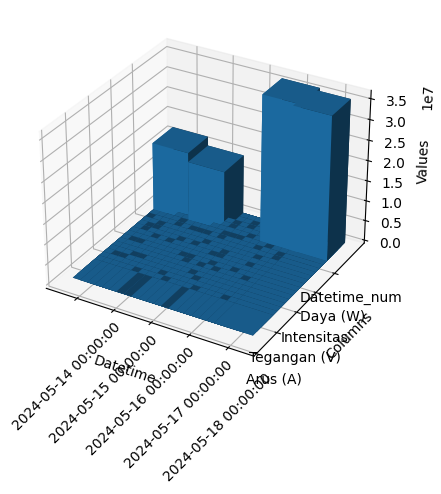

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_a is already prepared with 'Datetime' index and the columns to plot

# Number of bins for the histogram
num_bins = 20  # Adjust as necessary

# Convert Datetime index to numeric values for histogram
df_a['Datetime_num'] = df_a.index.map(pd.Timestamp.toordinal)

# Prepare data for 3D histogram
x = df_a['Datetime_num'].values

# Stack the values for all columns
values = []
for i, col in enumerate(df_a.columns):
    y = np.full_like(df_a[col].values, i)  # Create a constant y value for each column
    z = df_a[col].values
    values.append((x, y, z))

# Unpack the stacked values
x_values = np.concatenate([v[0] for v in values])
y_values = np.concatenate([v[1] for v in values])
z_values = np.concatenate([v[2] for v in values])

# Create a 3D histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Compute the 3D histogram
hist, xedges, yedges = np.histogram2d(x_values, y_values, bins=num_bins, weights=z_values)

# Construct arrays for the anchor positions of the bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the bars
dx = dy = np.ones_like(zpos)
dz = hist.ravel()

# Plot the 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set axis labels
ax.set_xlabel('Datetime')
ax.set_ylabel('Columns')
ax.set_zlabel('Values')

# Set y-ticks to be the column names
ax.set_yticks(np.arange(len(df_a.columns)))
ax.set_yticklabels(df_a.columns)

# Convert the numeric datetime values back to datetime format for x-ticks
xlabels = [pd.Timestamp.fromordinal(int(label)) for label in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45)

plt.show()


In [32]:
file_path = 'Data PSP 05 Panel B.csv'
df_b = pd.read_csv(file_path)

# Continue with the rest of the process
# Convert 'Jam' to string before concatenation

df_b['Jam'] = df_b['Jam'].astype(str)

# Combine 'Tanggal' and 'Jam' into a single datetime column
df_b['Tanggal'] = '2024-05-' + df_b['Tanggal'].astype(str)
df_b['Datetime'] = pd.to_datetime(df_b['Tanggal'].astype(str) + ' ' + df_b['Jam'], format='%Y-%m-%d %H:%M')

# Set 'Datetime' as the index
df_b.set_index('Datetime', inplace=True)

# Drop the original 'Tanggal' and 'Jam' columns
df_b.drop(columns=['Tanggal', 'Jam'], inplace=True)

# Display the cleaned dataframe
df_b.head()

,Menit,Arus (A),Tegangan (V),Intensitas,Daya (W)
Datetime,,,,,
2024-05-13 10:00:00,0,0.3,18.8,907.0,5.64
2024-05-13 10:05:00,5,0.3,18.4,398.0,5.52
2024-05-13 10:10:00,10,0.3,18.9,926.7,5.67
2024-05-13 10:15:00,15,0.3,17.1,262.1,5.13
2024-05-13 10:20:00,20,0.3,18.6,970.5,5.58
